<a href="https://colab.research.google.com/github/garima140401/regression-analysis/blob/main/random_forest_regressor_housing_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#loading of dataset:
data = pd.read_csv('housing.csv')

#display of basic information regarding the dataset
print("Dataset information")
data.info()     #display all the parameters of the data with non null count value and dtype


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#data analysing:
data.head()     #display first 5 rows info

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#check for any missing values:
print("missing values per column\n")
print(data.isnull().sum())

missing values per column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
#replacing of missing value in total_bedrooms by its median:
data["total_bedrooms"].fillna(data["total_bedrooms"].median())

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20635,374.0
20636,150.0
20637,485.0
20638,409.0


In [ ]:
#replacing of missing values in total_bedrooms by the mode:
if data['total_bedrooms'].isnull().sum()>0:
   data['total_bedrooms']= data['total_bedrooms'].fillna(data['total_bedrooms'].mode()[0])
print(data['total_bedrooms'])

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64


In [ ]:
#converting ocean_proximity to numeric using one hot encoding:
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first= True)

In [ ]:
#dislpay statistical summary:
print("STATISTICAL SUMMARY:\n")
data.describe()

STATISTICAL SUMMARY:



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


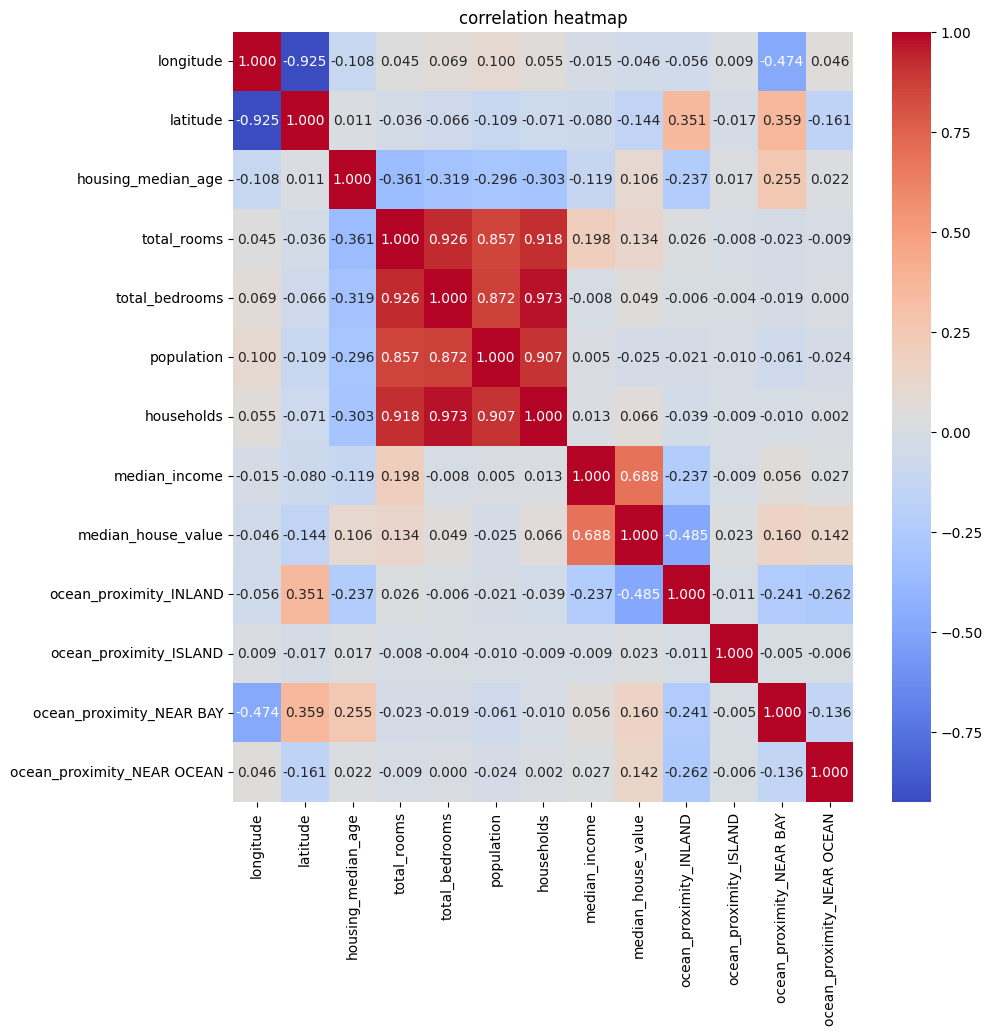

In [ ]:
#correlation heatmap:
plt.figure(figsize=(10,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm", fmt=".3f")
plt.title("correlation heatmap")
plt.show()

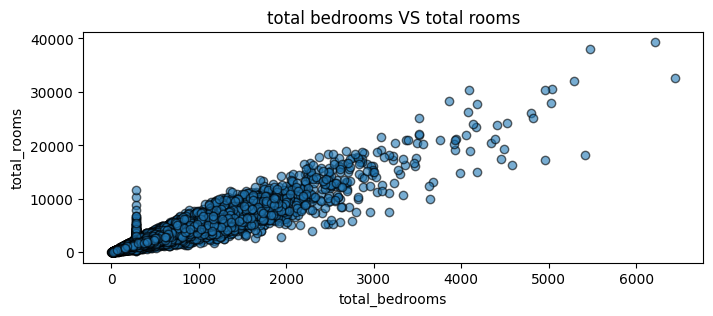

In [ ]:
#scatter plot of median_house_value and housing_median_age:
plt.figure(figsize=(8,3))
plt.scatter(data['total_bedrooms'], data['total_rooms'],alpha=0.6, edgecolor="k")
plt.title('total bedrooms VS total rooms')
plt.xlabel('total_bedrooms')
plt.ylabel('total_rooms')
plt.show()

In [ ]:
#import libraries for modelling:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
# Define inputs (features) and target variable
# Log-transform the target variable
data['log_median_house_value'] = np.log(data['median_house_value'])

X = data.drop(columns=["median_house_value"])  # Replace with actual column names if they differ
y = data["log_median_house_value"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

print("Random Forest model trained.")

Random Forest model trained.


In [ ]:
# Apply Recursive Feature Elimination (RFE)
n_features_to_select = 5 # Change this number based on your requirement
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features: {list(selected_features)}")


Selected features: ['longitude', 'latitude', 'housing_median_age', 'households', 'log_median_house_value']


In [ ]:
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train the model on selected features
rf_model.fit(X_train_selected, y_train)
# Predict on test data (log scale)
y_pred_log = rf_model.predict(X_test_selected)

# Back-transform predictions to original scale
y_pred_original = np.exp(y_pred_log)

# Compute the original MSE
y_test_original = np.exp(y_test)  # Back-transform test targets


# Make predictions and calculate MSE

mse = mean_squared_error(y_test_original, y_pred_original)
print(f"Mean Squared Error with selected features: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RFE was fitted without feature names
  warnings.warn(


Mean Squared Error with selected features: 3862.602161096375
